# Pandas native
see the complete list of options [in the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

In [1]:
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("data/cocktails.csv")

In [4]:
# Function to convert fluid ounces to milliliters
def convert_to_ml(measure):
    OZ_TO_ML = 29.5735
    
    # Split the measure by spaces and handle fractions manually
    if "oz" in measure:
        parts = measure.replace('oz', '').strip().split()
        total_oz = 0
        
        for part in parts:
            total_oz += eval(part)
            
        return round(total_oz * OZ_TO_ML, 2)

# Apply the conversion to the measures column
df['measures_ml'] = df['measure'].apply(convert_to_ml)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3643 non-null   object 
 1   category           3643 non-null   object 
 2   row_id             3643 non-null   int64  
 3   ingredient_number  3643 non-null   int64  
 4   ingredient         3643 non-null   object 
 5   measure            3643 non-null   object 
 6   measures_ml        3589 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 199.4+ KB


<Axes: title={'center': 'Most used cocktail ingredients'}, ylabel='ingredient'>

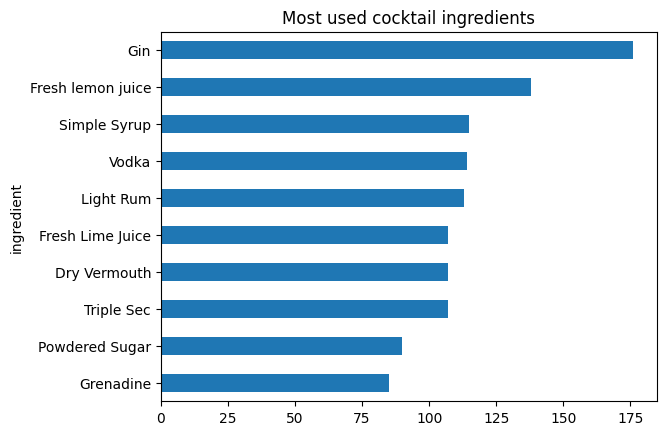

In [108]:
df.ingredient.value_counts().head(10).sort_values()\
    .plot.barh(title="Most used cocktail ingredients")

<Axes: title={'center': 'Cocktails usually contain more than around 45ml of gin'}, ylabel='Frequency'>

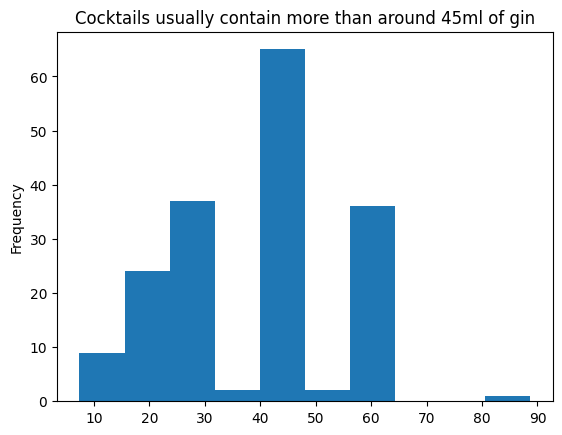

In [48]:
df.query("ingredient == 'Gin'")["measures_ml"]\
    .sort_values()\
    .plot.hist(title="Cocktails usually contain more than around 45ml of gin")

In [67]:
df2 = pd.read_excel("data/titanic.xls")
df2["survived"] = df2["survived"].astype("str")

<Axes: xlabel='age', ylabel='fare'>

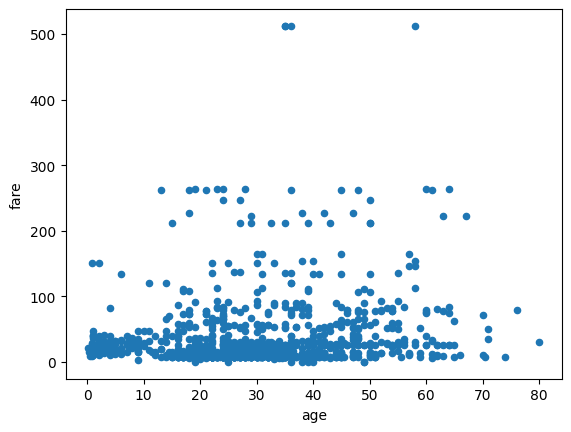

In [68]:
df2.plot.scatter(x="age", y="fare")

In [69]:
df2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Altair
- see the [example gallery](https://altair-viz.github.io/gallery/index.html#example-gallery) for code

In [ ]:
pip install altair

In [61]:
import altair as alt

In [111]:
alt.Chart(df2).mark_circle(size=60).encode(
    x='age',
    y='fare',
    color='survived',
    column='sex',
    row = 'pclass',
    tooltip=['name']
).interactive()

alt.Chart(...)

In [92]:
df.drop_duplicates("name").category.value_counts()

category
Cocktail Classics        467
Vodka                    138
Rum - Daiquiris          111
Whiskies                 110
Tequila                   87
Brandy                    47
Gin                       17
Cordials and Liqueurs      8
Shooters                   2
Non-alcoholic Drinks       1
Rum                        1
Name: count, dtype: int64

In [103]:
filtered = df.query("category == 'Gin'")
filtered.name.unique()

array(['Yokahama Romance', 'Yale Cocktail', 'Xanthia Cocktail',
       'Woodstock', "Wolf's Bite", 'The Winkle', 'The Wink',
       'Will Rogers', 'White Spider', 'White Lady', 'Western Rose',
       'Wembly Cocktail', 'Water Lily', 'Wallis Blue Cocktail',
       'Wallick Cocktail', 'Waikiki Beachcomber', 'Vow Of Silence'],
      dtype=object)

In [101]:
ingredient_selection = alt.selection_point(fields=["ingredient"], bind="legend")

alt.Chart(filtered).mark_bar().encode(
    x="measures_ml",
    y="name",
    color="ingredient",
    opacity=alt.condition(ingredient_selection, alt.value(1), alt.value(0.2))
).add_params(
    ingredient_selection
).properties(width=220)


alt.Chart(...)